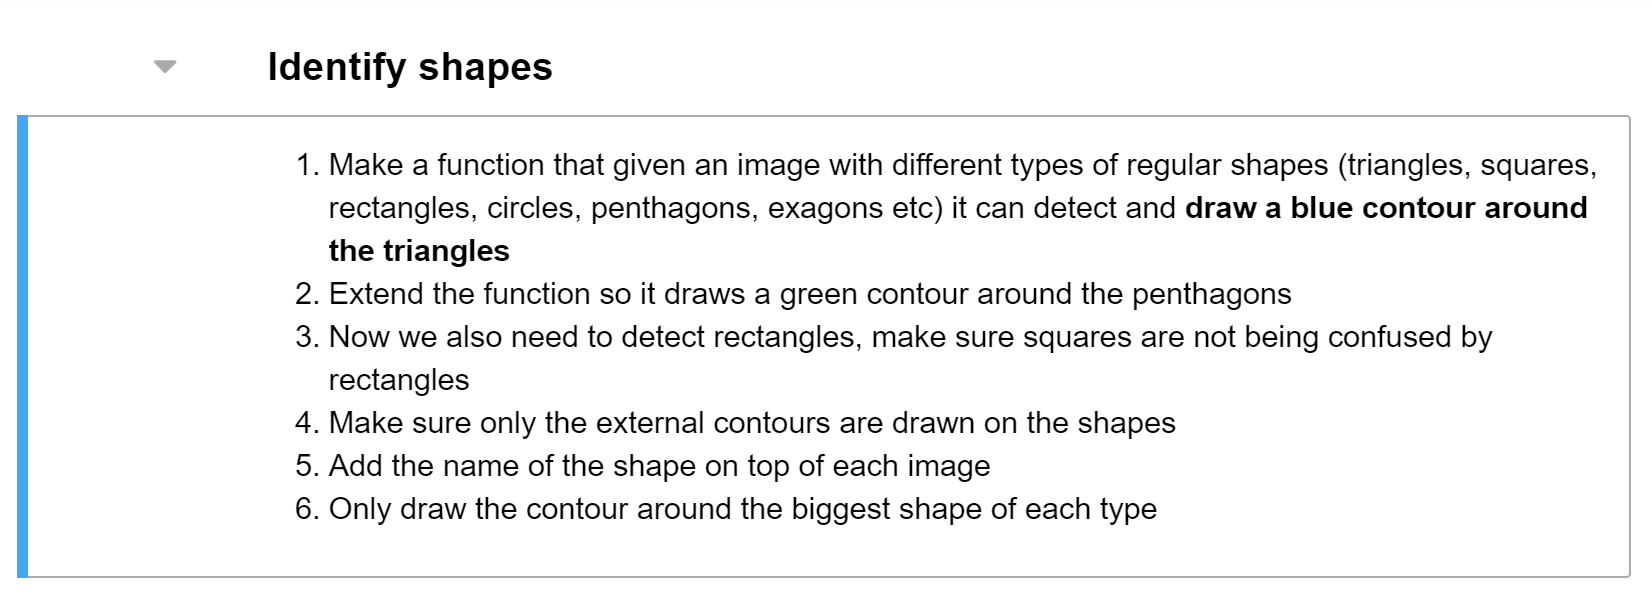

In [273]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [281]:
def show_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
def show_grayscale_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')
    

In [288]:
def identify_shapes(img):
    img_clone = np.copy(shapes)
    img_clone = cv2.cvtColor(img_clone, cv2.COLOR_BGR2GRAY)
    gaussianBlur = cv2.GaussianBlur(img_clone, (3,3), -1)

    ret, thresh = cv2.threshold(gaussianBlur, 50, 250, cv2.THRESH_BINARY_INV)
    show_grayscale_img(thresh)
    edges = cv2.Canny(thresh, 0, 255)

    contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    print(f"Found {len(contours[1])} lines")

    for c in contours[1]:
        print(c.shape)
        accuracy = 0.05
        perimeter = cv2.arcLength(c, True)
        epsilon = accuracy * perimeter
        approx = cv2.approxPolyDP(c, epsilon, True)
        
        # print(len(approx))
        if len(approx) is 3:
           
            cv2.drawContours(img, [approx], 0, (255, 0, 0), 10)

            show_img(img)
        if len(approx) is 4:
            for side in approx:
                print("side", side)
           
            cv2.drawContours(img, [approx], 0, (0, 255, 0), 10)
            show_img(img)

        if len(approx) is 5:
           
            cv2.drawContours(img, [approx], 0, (0, 0, 255), 10)
            show_img(img)
        
        if len(approx) is 6:
           
            cv2.drawContours(img, [approx], 0, (0, 255, 255), 10)
            show_img(img)
    
        if len(approx) > 10:
           
            cv2.drawContours(img, [approx], 0, (0, 255, 255), 10)
            show_img(img)

Found 19 lines
(296, 1, 2)
(358, 1, 2)
side [[ 86 570]]
side [[ 85 661]]
side [[174 661]]
side [[174 571]]
(268, 1, 2)
side [[438 569]]
side [[399 624]]
side [[455 662]]
side [[492 607]]
(319, 1, 2)
(356, 1, 2)
side [[ 73 443]]
side [[ 71 532]]
side [[161 533]]
side [[161 444]]
(266, 1, 2)
side [[272 414]]
side [[227 468]]
side [[279 508]]
side [[320 453]]
(358, 1, 2)
side [[535 408]]
side [[533 498]]
side [[623 499]]
side [[623 409]]
(320, 1, 2)
(368, 1, 2)
side [[488 319]]
side [[489 378]]
side [[612 378]]
side [[610 316]]
(368, 1, 2)
side [[259 302]]
side [[260 361]]
side [[384 361]]
side [[383 300]]
(295, 1, 2)
(284, 1, 2)
(279, 1, 2)
(322, 1, 2)
(321, 1, 2)
(371, 1, 2)
side [[93 39]]
side [[95 98]]
side [[219  98]]
side [[216  35]]
(268, 1, 2)
side [[477  29]]
side [[438  83]]
side [[494 122]]
side [[531  66]]
(280, 1, 2)
(2827, 1, 2)
side [[707   0]]
side [[707 706]]
side [[  0 707]]
side [[707 707]]


/anaconda3/envs/akademy-downgrade/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


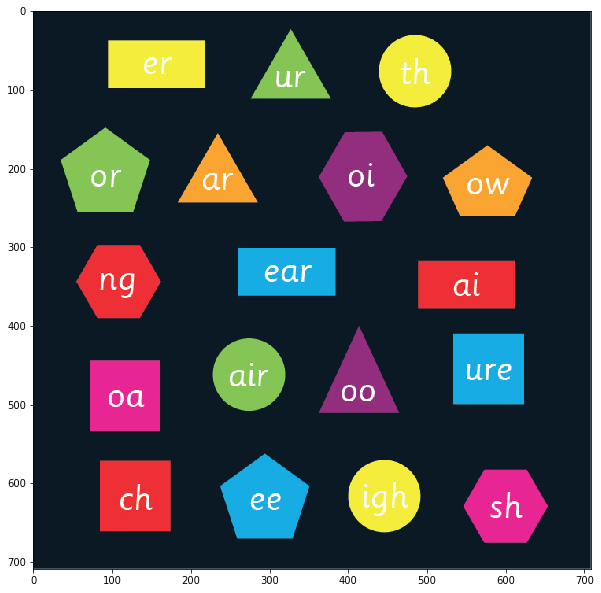

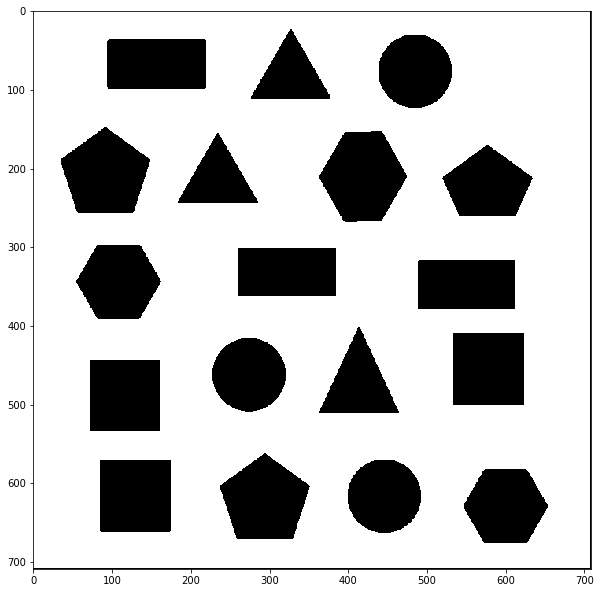

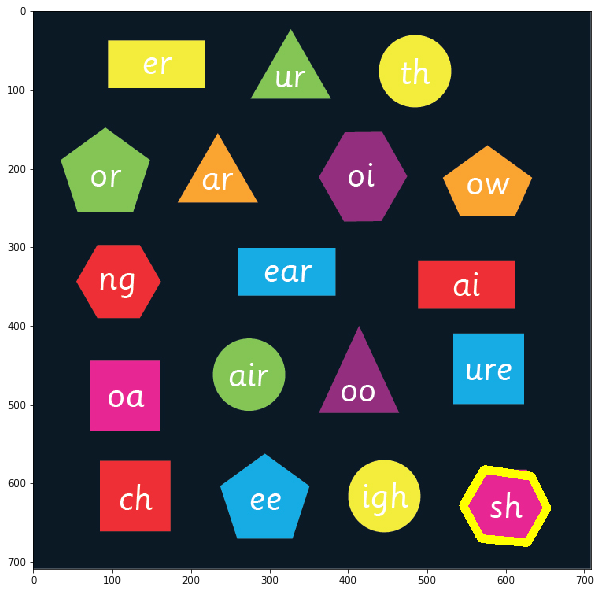

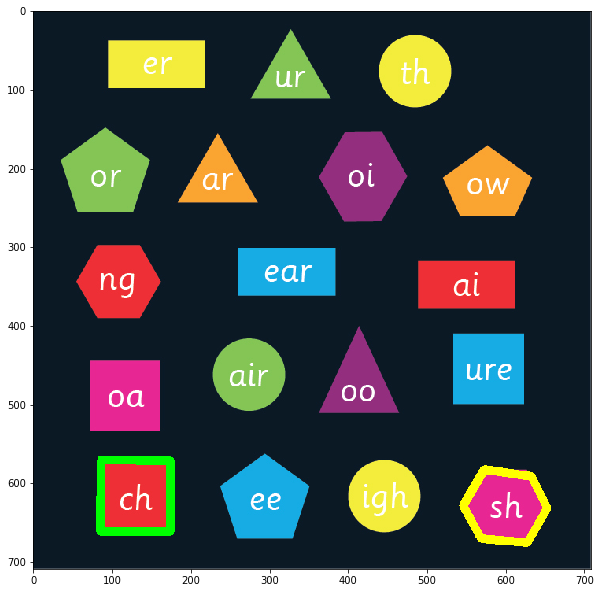

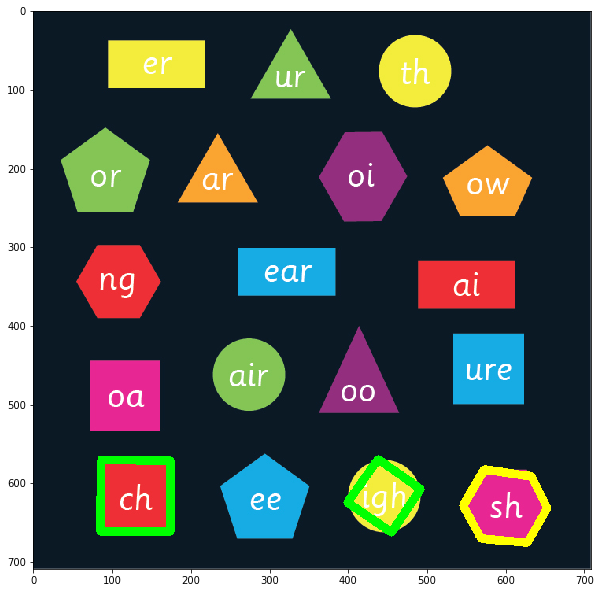

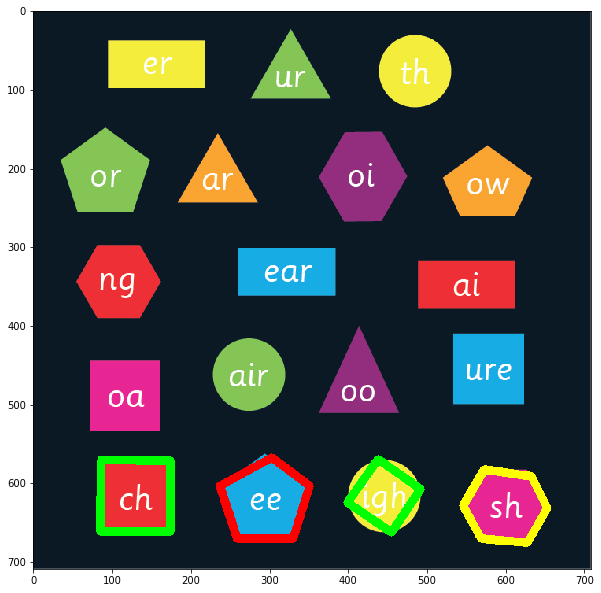

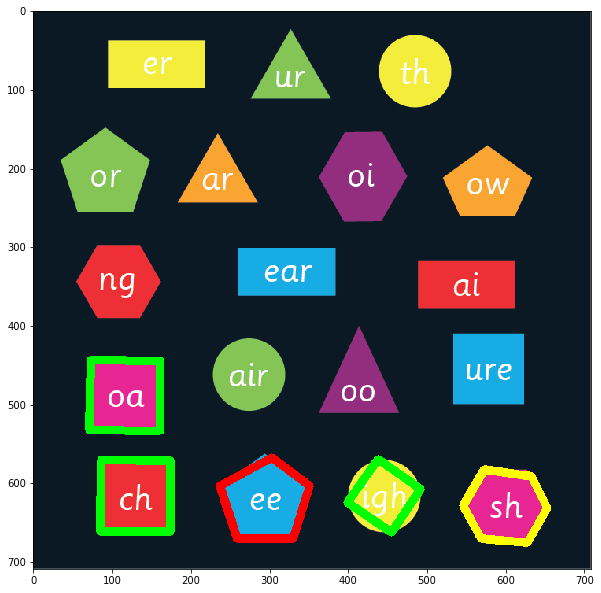

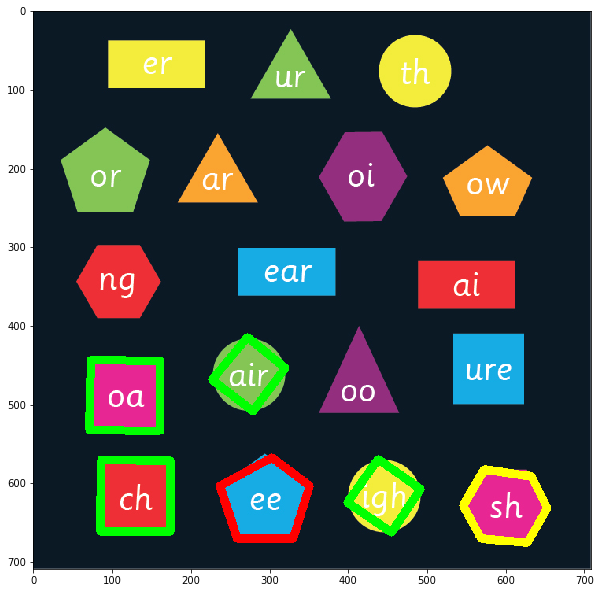

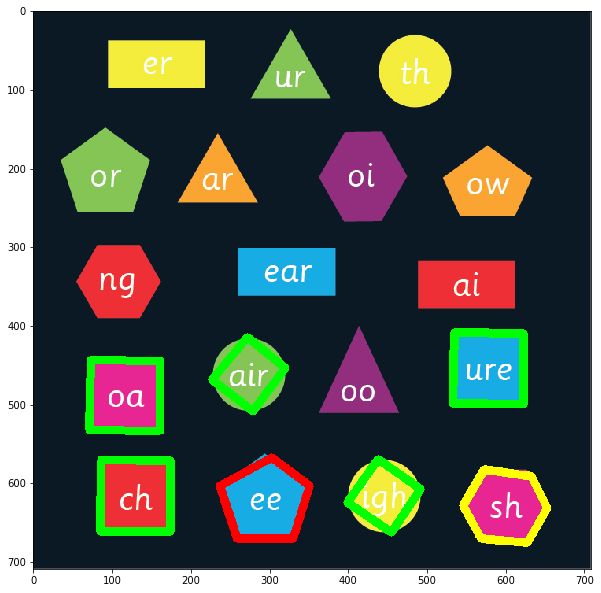

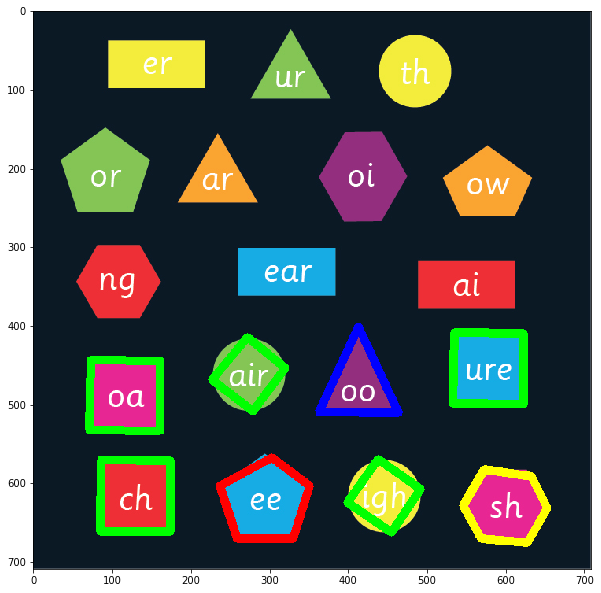

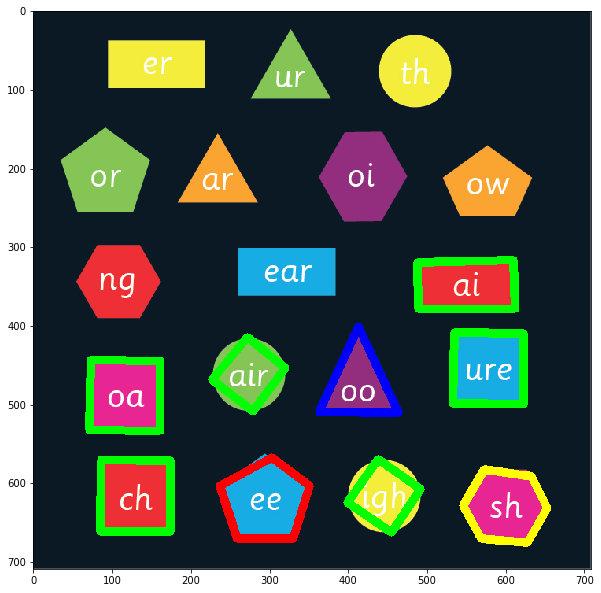

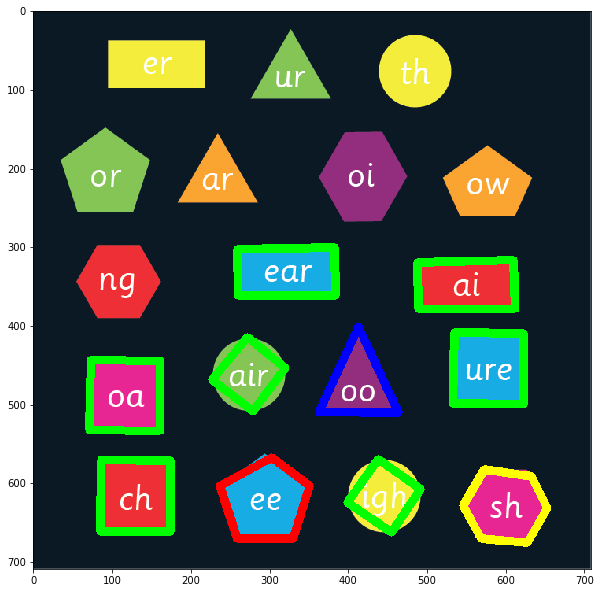

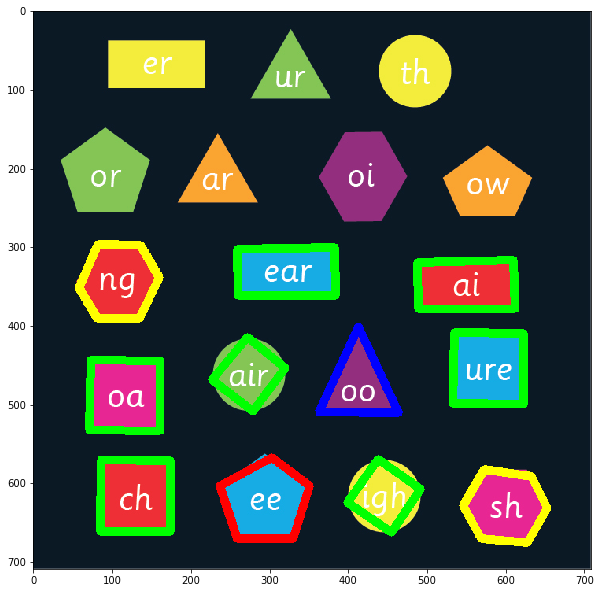

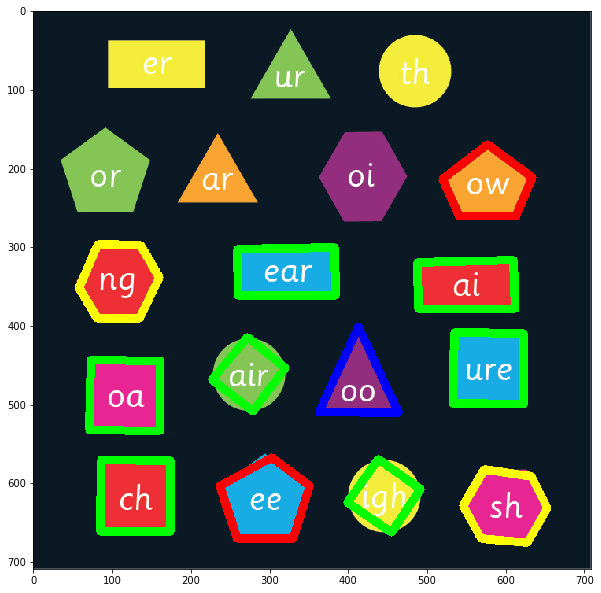

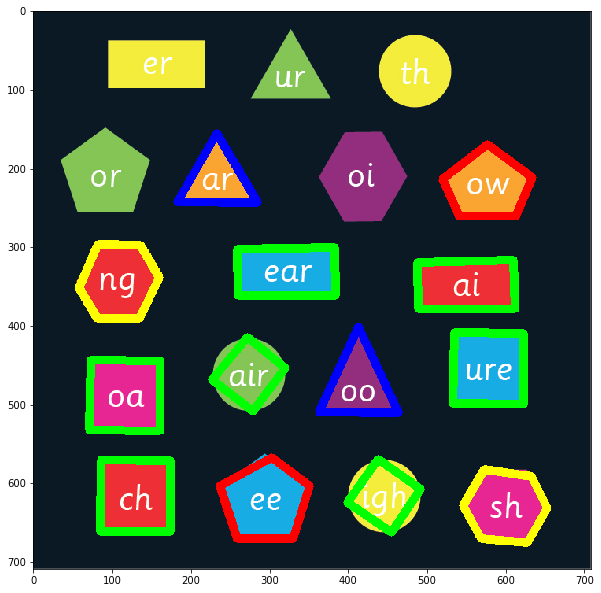

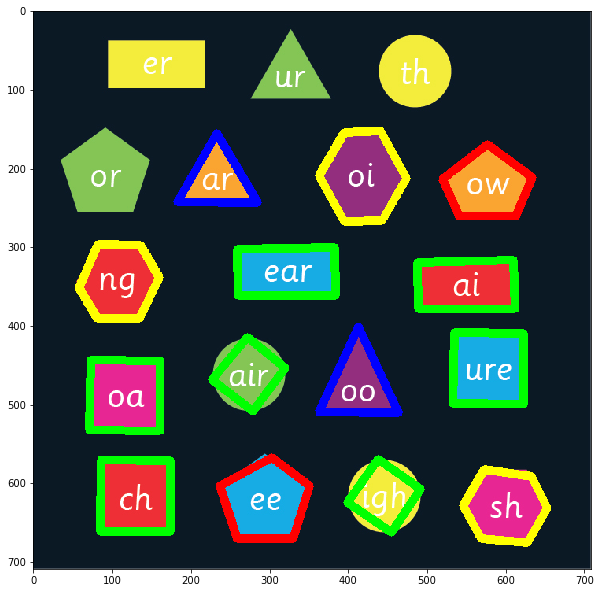

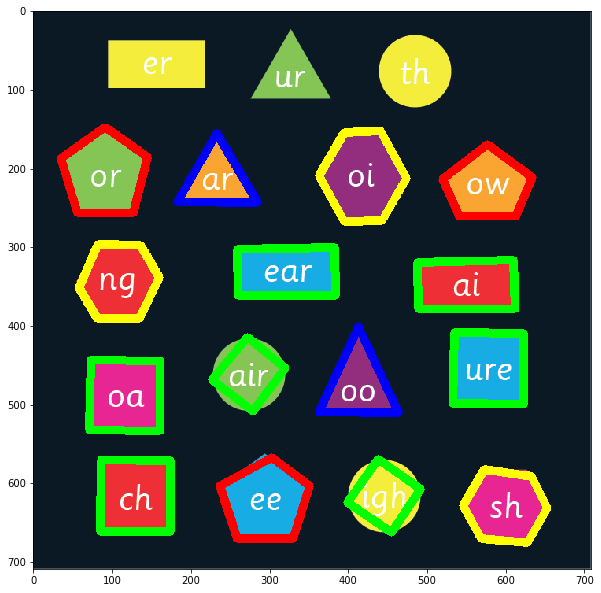

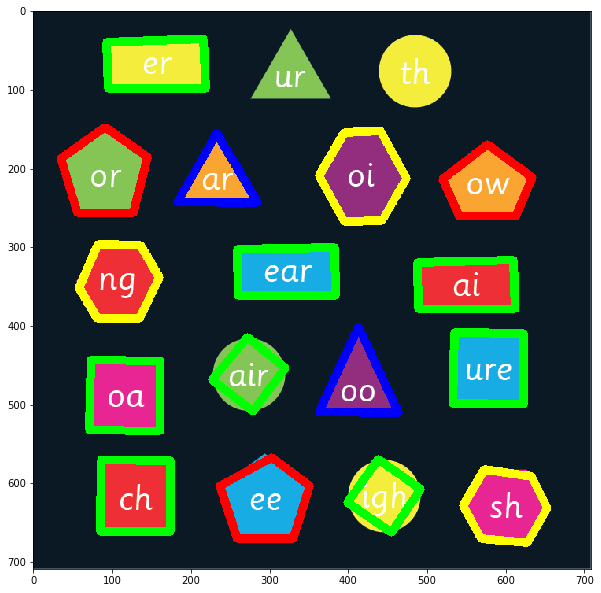

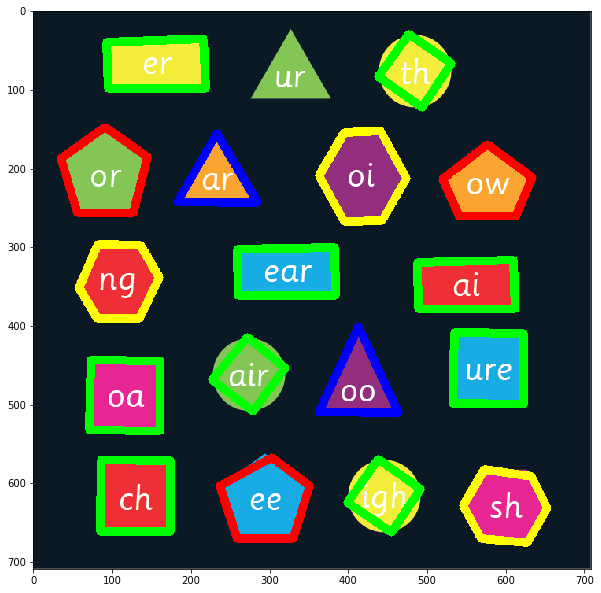

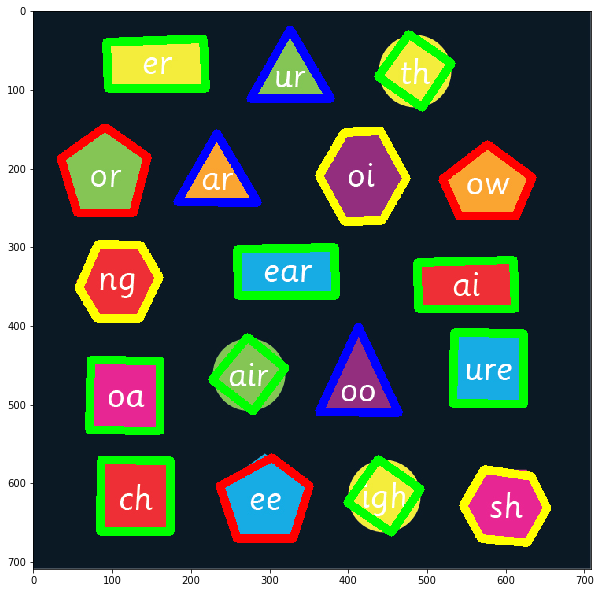

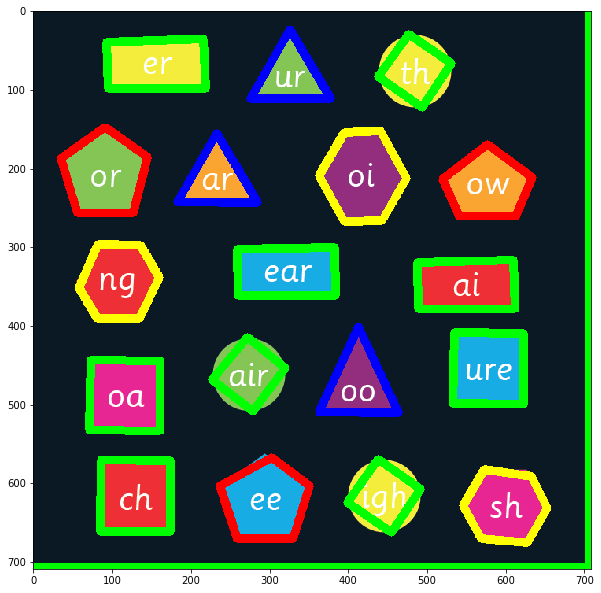

In [291]:
shapes = cv2.imread("img/shapes2.jpg")
show_img(shapes)
identify_shapes(shapes)

In [292]:
def identify_shapes_in_barcelona(img):
    img_clone = np.copy(shapes)
    #gaussianBlur = cv2.GaussianBlur(img_clone, (3,3), -1)
    #show_grayscale_img(gaussianBlur)
    B, G, R = cv2.split(img_clone)
    print("shape", img_clone.shape)
    pixel_values_matrix_one_channel = np.ones((img_clone.shape[0], img_clone.shape[1]), dtype='uint8') * 200

    # modifying the blue channel
    B = cv2.add(B, pixel_values_matrix_one_channel)

    # merging the channels again
    img = cv2.merge([B, G, R])
    show_img(img, "Blue channel enhanced by 200")    
    ret, thresh = cv2.threshold(img, 130, 220, cv2.THRESH_BINARY_INV)
    show_grayscale_img(thresh)
    edges = cv2.Canny(img, 80, 100)

    contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    biggest = sorted(contours[1], key=cv2.contourArea, reverse=True)
    print(f"Found {len(contours[1])} lines")
    cv2.drawContours(img, biggest, 0, (0, 255, 0), 10)
    img_rgb = cv2.cvtColor(img_clone, cv2.COLOR_BGR2RGB)

    show_img(img_rgb)
    
    for c in contours[1]:
        print(c.shape)
        accuracy = 0.05
        perimeter = cv2.arcLength(c, True)
        epsilon = accuracy * perimeter
        approx = cv2.approxPolyDP(c, epsilon, True)
        

        show_img(img)
        cv2.drawContours(img_rgb, [approx], 0, (0, 255, 0), 10)
    
    

Found 20 lines
(327, 1, 2)
(276, 1, 2)
side [[437 563]]
side [[393 625]]
side [[458 667]]
side [[497 604]]
(390, 1, 2)
side [[ 83 565]]
side [[ 80 664]]
side [[177 666]]
side [[179 568]]
(351, 1, 2)
(158, 1, 2)
(388, 1, 2)
side [[ 70 438]]
side [[ 66 535]]
side [[164 538]]
side [[166 441]]
(354, 1, 2)
side [[412 415]]
side [[372 503]]
side [[413 415]]
side [[455 503]]
(270, 1, 2)
side [[271 408]]
side [[221 469]]
side [[282 513]]
side [[325 450]]
(390, 1, 2)
side [[532 403]]
side [[528 501]]
side [[626 504]]
side [[628 406]]
(398, 1, 2)
side [[615 313]]
side [[485 314]]
side [[484 381]]
side [[615 383]]
(400, 1, 2)
side [[388 297]]
side [[258 296]]
side [[254 362]]
side [[387 366]]
(331, 1, 2)
(227, 1, 2)
(314, 1, 2)
(357, 1, 2)
(353, 1, 2)
(229, 1, 2)
(401, 1, 2)
side [[221  32]]
side [[90 34]]
side [[ 90 101]]
side [[222 103]]
(276, 1, 2)
side [[476  23]]
side [[432  84]]
side [[497 127]]
side [[536  63]]
(2797, 1, 2)
side [[700   0]]
side [[700 698]]
side [[  0 700]]
side [[700 699]

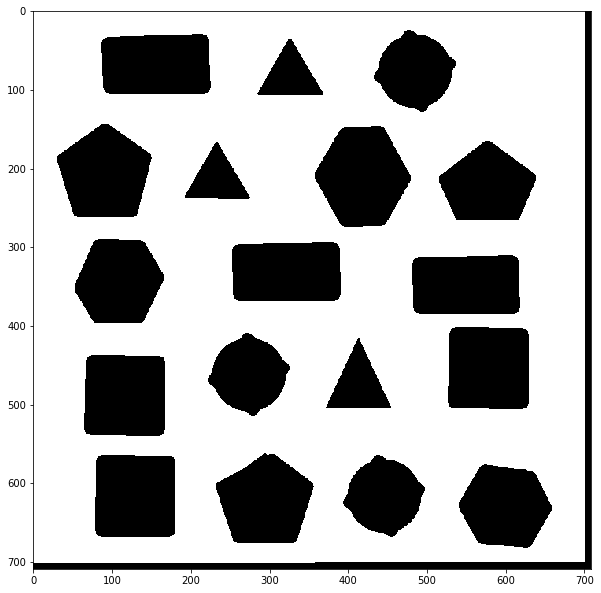

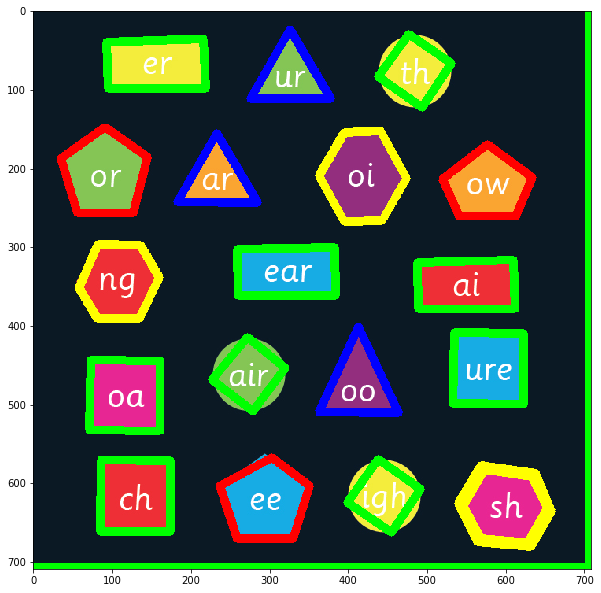

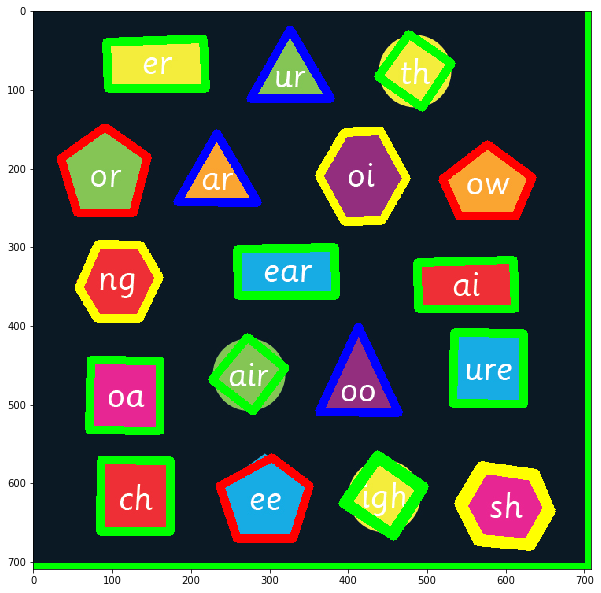

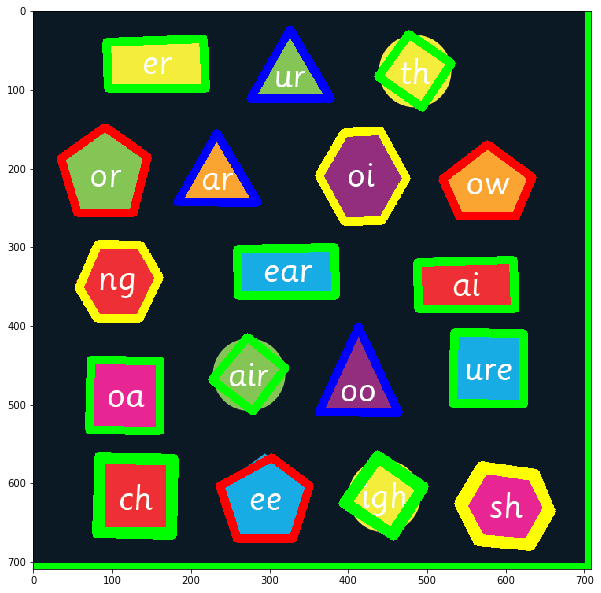

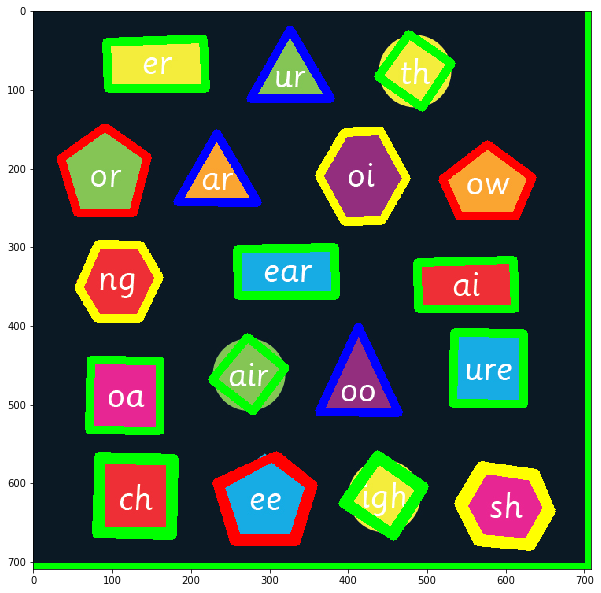

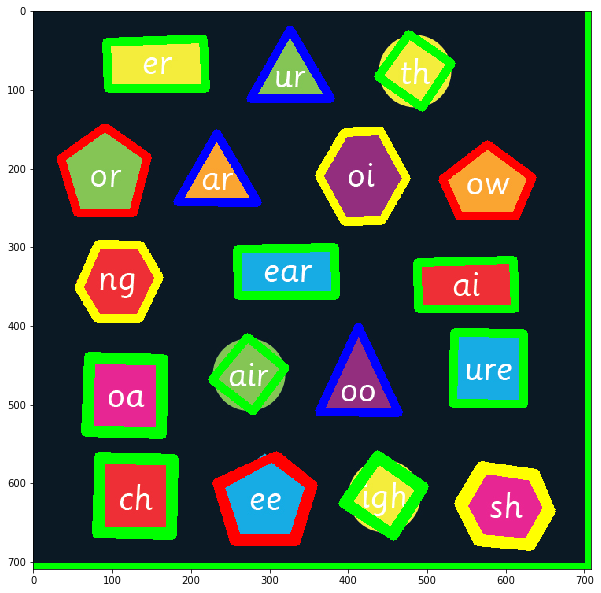

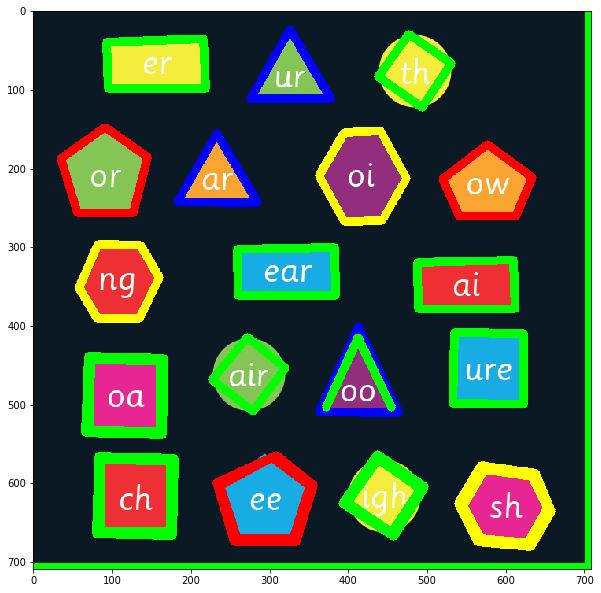

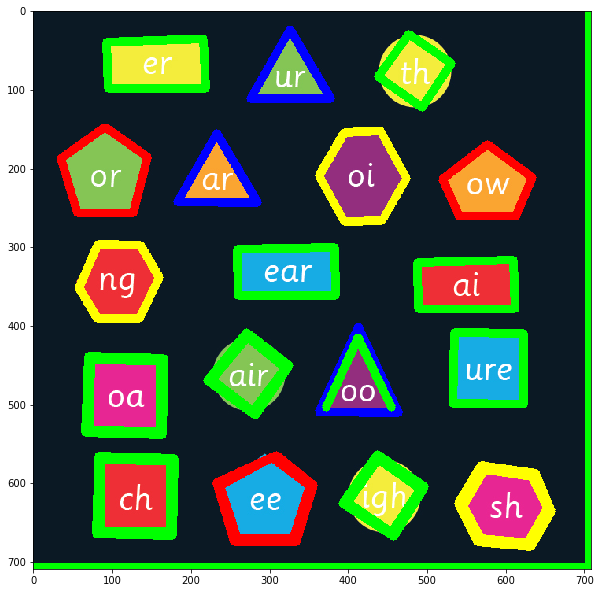

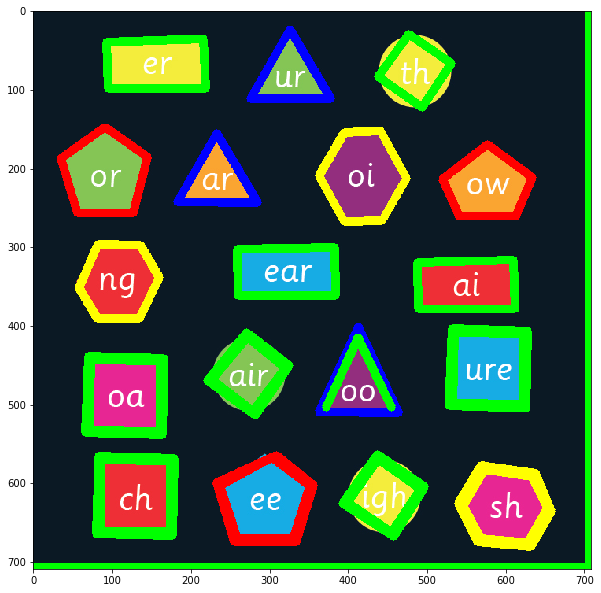

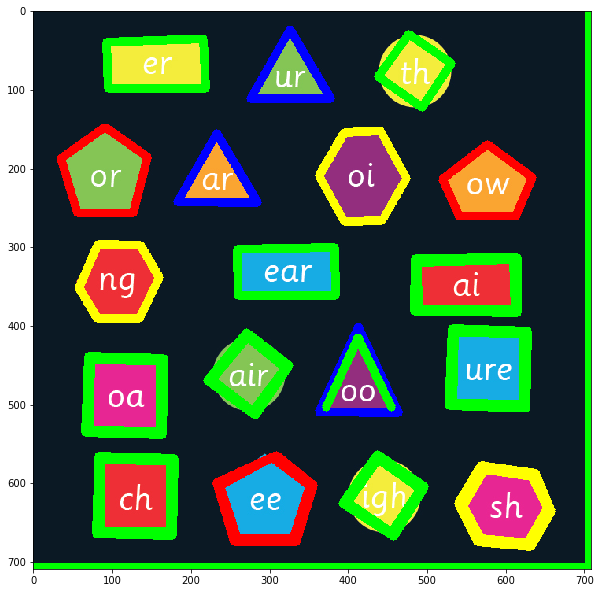

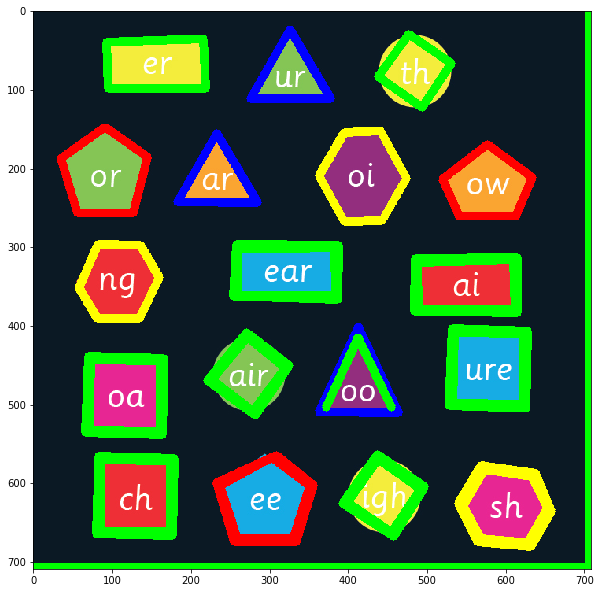

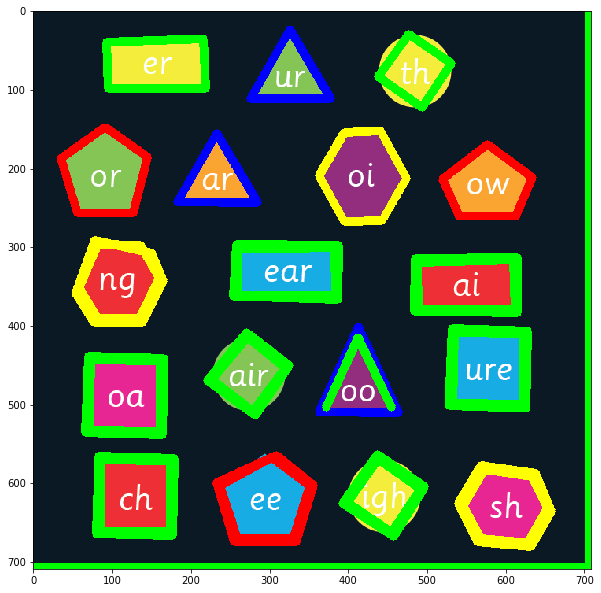

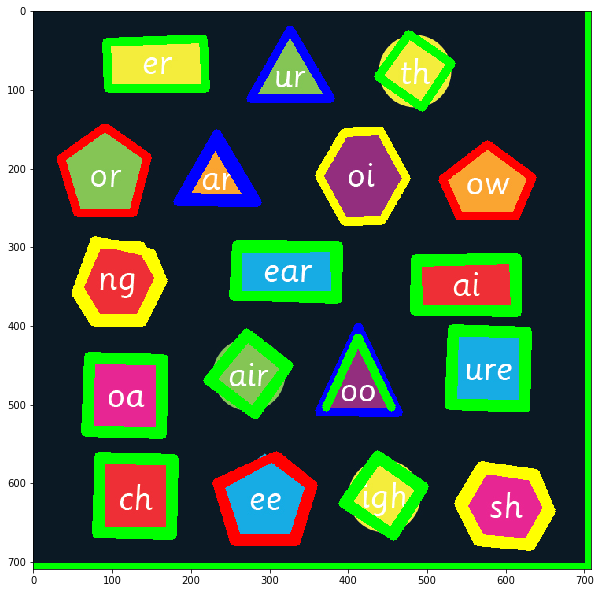

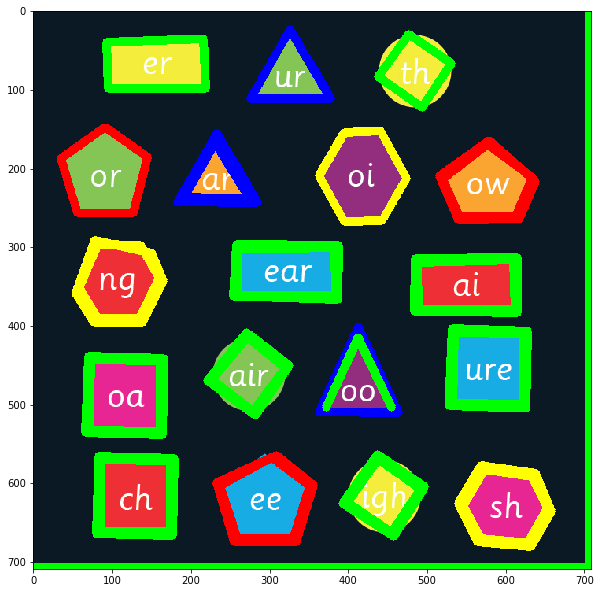

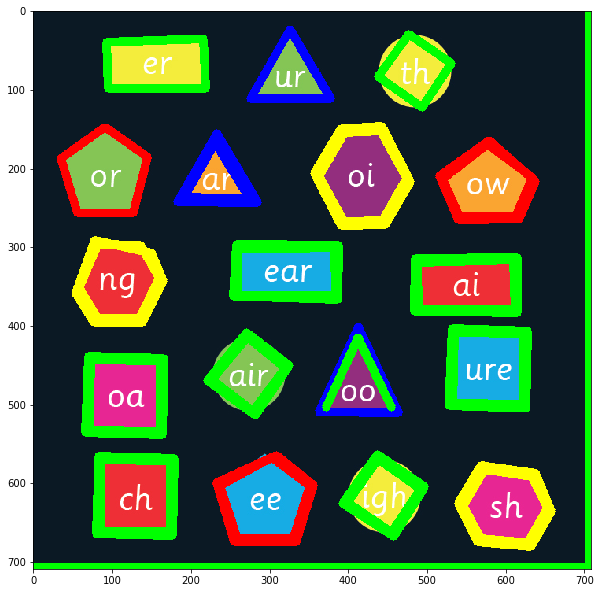

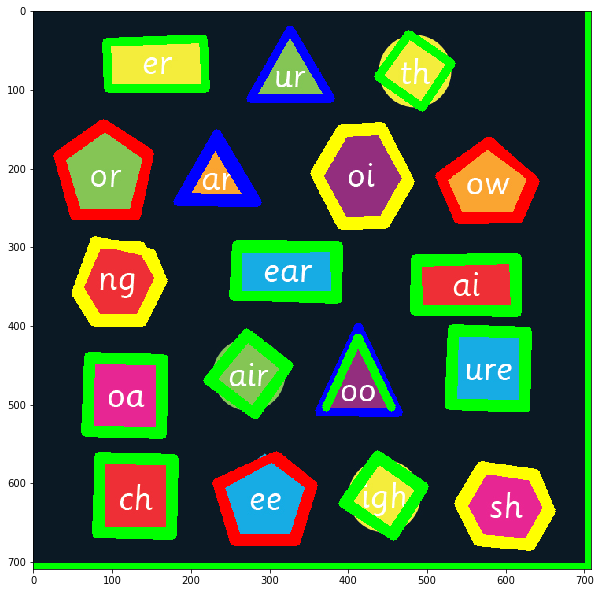

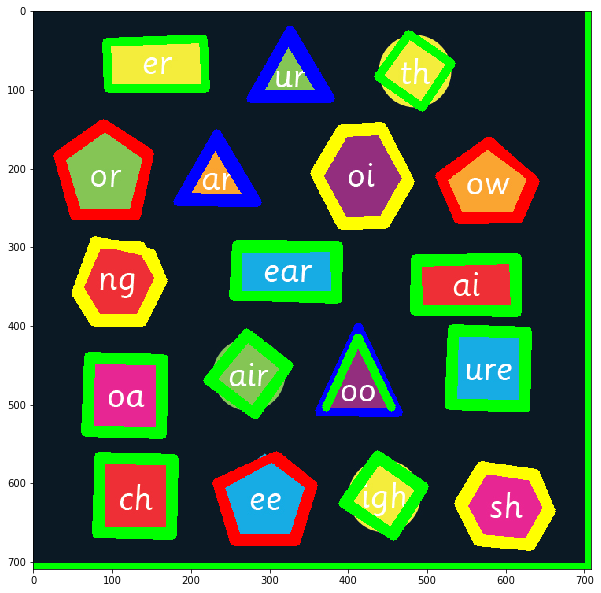

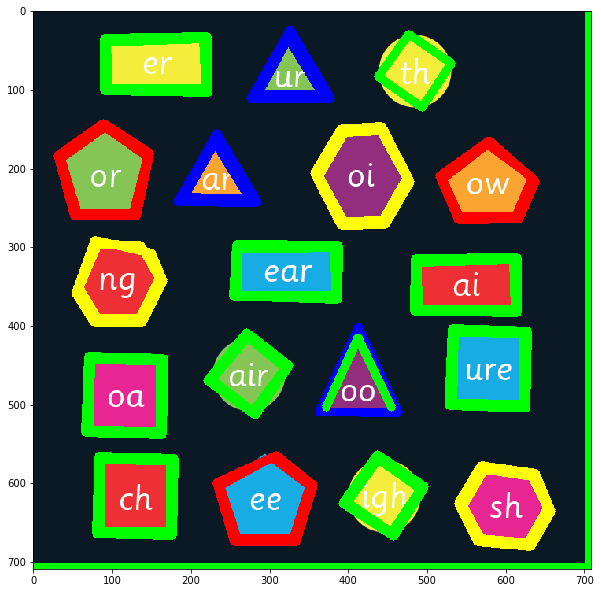

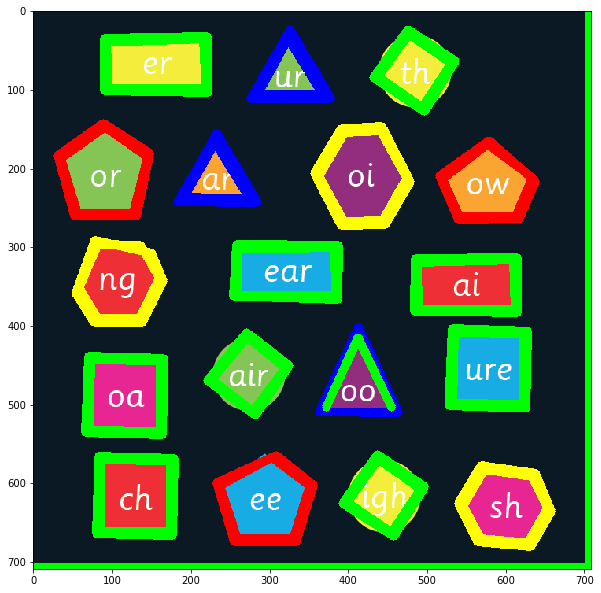

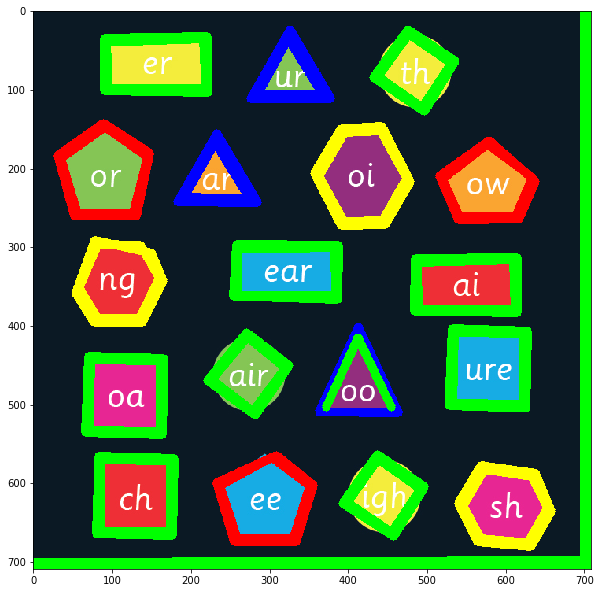

In [293]:
identify_shapes(shapes)